In [36]:
import pandas as pd# for data manipulation
import numpy as np 
import matplotlib.pyplot as plt#to plot our data and create visualizations
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
#set the parameters that control the general style of the plot
sns.set_style('darkgrid')
#runtime features pararmeters configuration
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=(10,7)
plt.rcParams['figure.facecolor']= '#FFE5B4'

In [6]:
#load our dataset
data=pd.read_csv("world-happiness-report-2021.csv")

In [7]:
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [8]:
#drop some columns that we don't need
data_columns=['Country name','Regional indicator','Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']


In [9]:
data=data[data_columns].copy()

In [10]:
data

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821


In [11]:
#we will rename the columns to make it simpler
happy_df= data.rename(columns={'Country name':'country_name','Regional indicator':'regional_indicator','Ladder score':'ladder_score','Logged GDP per capita':'logged_gdp_per_capital','Social support':'social_support','Healthy life expectancy':'healthy_life_expectancy','Freedom to make life choices':'freedom_to_make_life_choices','Generosity':'generosity','Perceptions of corruption':'corruption'},inplace=True)

In [12]:
column_headers = list(data.columns.values)
print(column_headers)

['country_name', 'regional_indicator', 'ladder_score', 'logged_gdp_per_capital', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'corruption']


In [13]:
#check null values
happy_df=data.copy()
happy_df.isnull().sum()


country_name                    0
regional_indicator              0
ladder_score                    0
logged_gdp_per_capital          0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
corruption                      0
dtype: int64

Text(0, 0.5, 'Happiness Score')

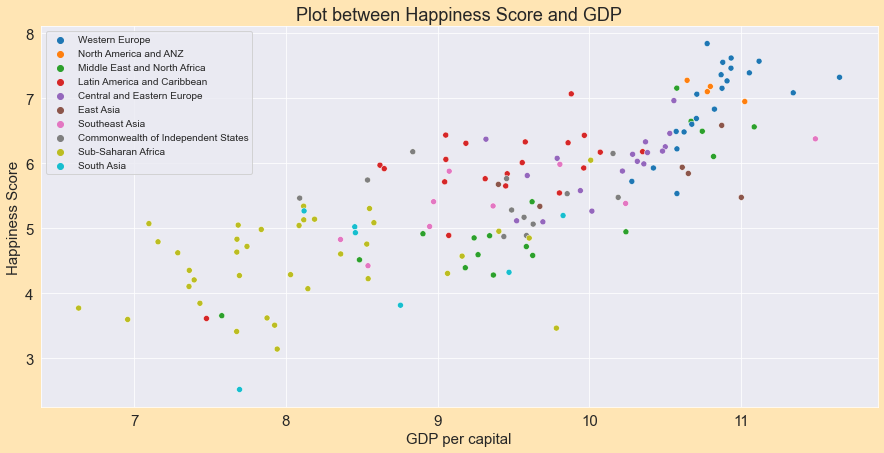

In [14]:
#plot between happiness and gdp 
plt.rcParams['figure.figsize']=(15,7)
plt.title('Plot between Happiness Score and GDP')
sns.scatterplot(x=happy_df.logged_gdp_per_capital,y=happy_df.ladder_score,hue=happy_df.regional_indicator)
plt.legend(loc='upper left', fontsize='10')
plt.xlabel('GDP per capital')
plt.ylabel('Happiness Score')

In [15]:
gdp_region=happy_df.groupby('regional_indicator')['logged_gdp_per_capital'].sum()
gdp_region

regional_indicator
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: logged_gdp_per_capital, dtype: float64

Text(0, 0.5, '')

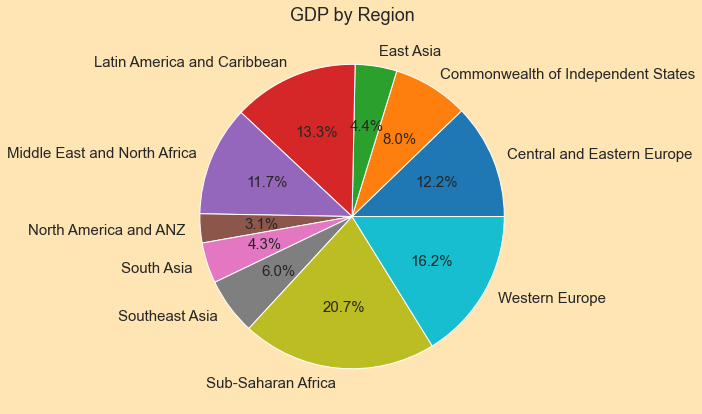

In [16]:
gdp_region.plot.pie(autopct= '%1.1f%%')
plt.title('GDP by Region')
plt.ylabel('')

In [17]:
#Total countries
total_country= happy_df.groupby('regional_indicator')[['country_name']].count()
print(total_country)

                                    country_name
regional_indicator                              
Central and Eastern Europe                    17
Commonwealth of Independent States            12
East Asia                                      6
Latin America and Caribbean                   20
Middle East and North Africa                  17
North America and ANZ                          4
South Asia                                     7
Southeast Asia                                 9
Sub-Saharan Africa                            36
Western Europe                                21


C:\Users\WhiteLuce SIS\AppData\Local\Temp\ipykernel_19896\318336085.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(cor,mask=np.zeros_like(cor,dtype=np.bool),cmap="Blues",square=True,annot=True)


<AxesSubplot:>

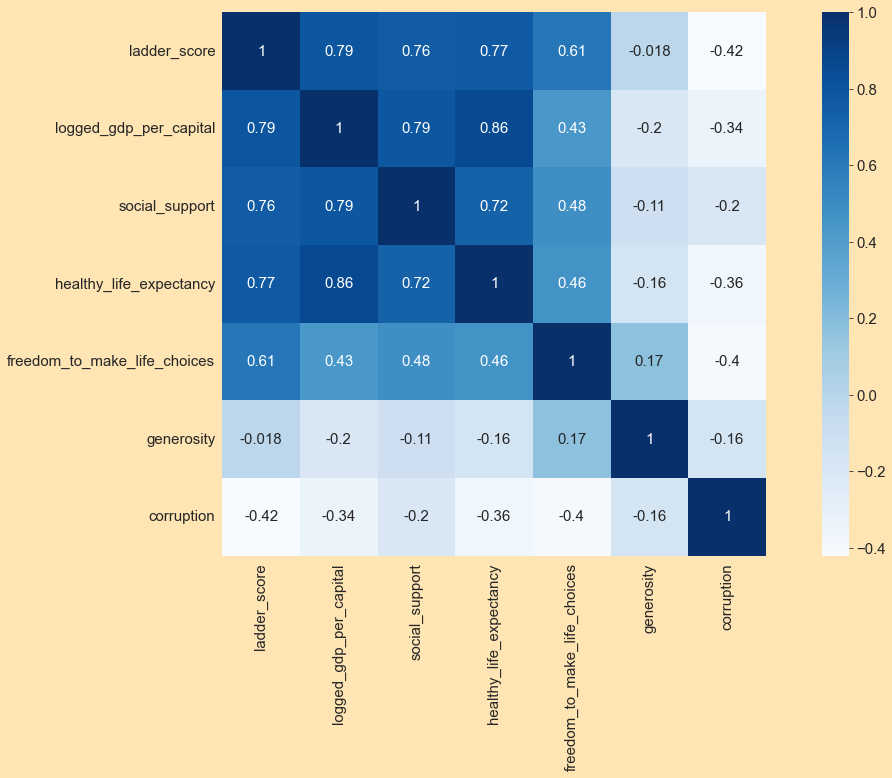

In [18]:
#let's visualize the correlation between variables

cor= happy_df.corr(method="pearson")
f,ax=plt.subplots(figsize=(20,10))
sns.heatmap(cor,mask=np.zeros_like(cor,dtype=np.bool),cmap="Blues",square=True,annot=True)

In [19]:
#corruption in regions
corruption = happy_df.groupby('regional_indicator')[['corruption']].mean()
corruption

,corruption
regional_indicator,
Central and Eastern Europe,0.850529
Commonwealth of Independent States,0.725083
East Asia,0.683333
Latin America and Caribbean,0.792600
Middle East and North Africa,0.762235
North America and ANZ,0.449250
South Asia,0.797429
Southeast Asia,0.709111
Sub-Saharan Africa,0.765944


<BarContainer object of 10 artists>

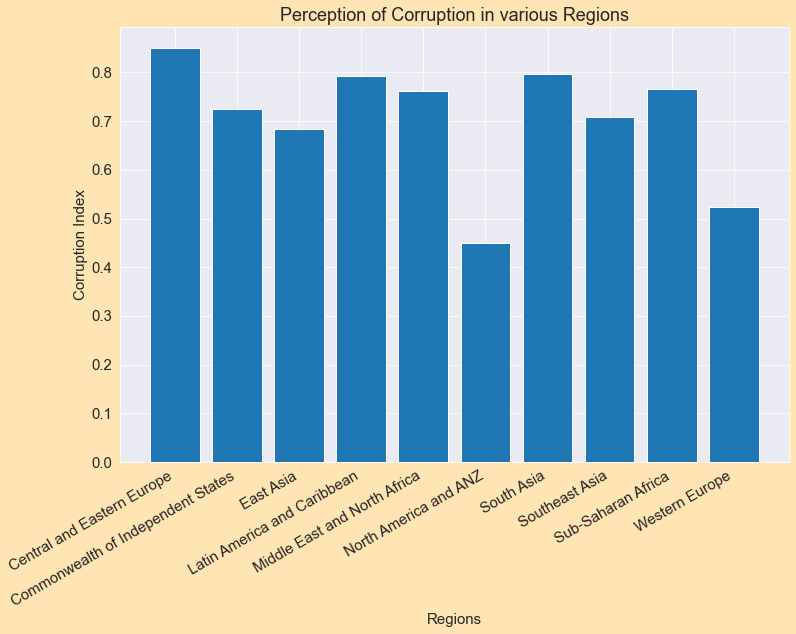

In [20]:
plt.rcParams['figure.figsize']=(12,8)
plt.title('Perception of Corruption in various Regions')
plt.xlabel('Regions',fontsize=15)
plt.ylabel('Corruption Index',fontsize=15)
plt.xticks(rotation=30,ha='right')
plt.bar(corruption.index,corruption.corruption)

In [21]:
top_10 = happy_df.head(10)
bottom_10=happy_df.tail(10)

C:\Users\WhiteLuce SIS\AppData\Local\Temp\ipykernel_19896\164067708.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels,rotation=45,ha='right')
C:\Users\WhiteLuce SIS\AppData\Local\Temp\ipykernel_19896\164067708.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabels,rotation=45,ha='right')


Text(599.1068181818181, 0.5, 'Life Expectancy')

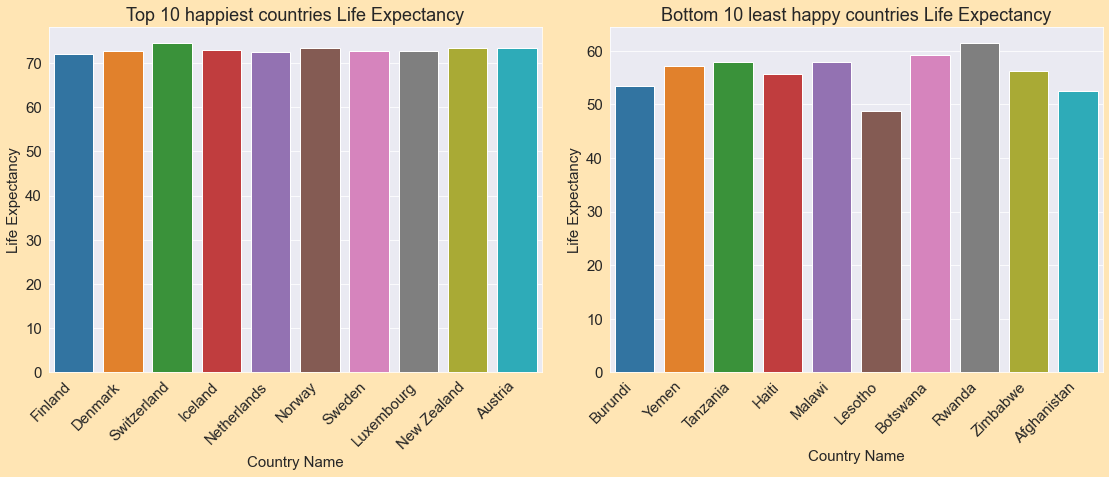

In [22]:
fig,axes= plt.subplots(1,2, figsize=(16,6))
plt.tight_layout(pad=2)
xlabels=top_10.country_name
axes[0].set_title('Top 10 happiest countries Life Expectancy')
axes[0].set_xticklabels(xlabels,rotation=45,ha='right')
sns.barplot(x=top_10.country_name, y=top_10.healthy_life_expectancy,ax=axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Life Expectancy')

xlabels=bottom_10.country_name
axes[1].set_title('Bottom 10 least happy countries Life Expectancy')
axes[1].set_xticklabels(xlabels,rotation=45,ha='right')
sns.barplot(x=bottom_10.country_name, y=bottom_10.healthy_life_expectancy,ax=axes[1])
axes[1].set_xlabel('Country Name')
axes[1].set_ylabel('Life Expectancy')


In [23]:
column_headers = list(data.columns.values)
print(column_headers)

['country_name', 'regional_indicator', 'ladder_score', 'logged_gdp_per_capital', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'corruption']


Text(0, 0.5, 'Happiness Score')

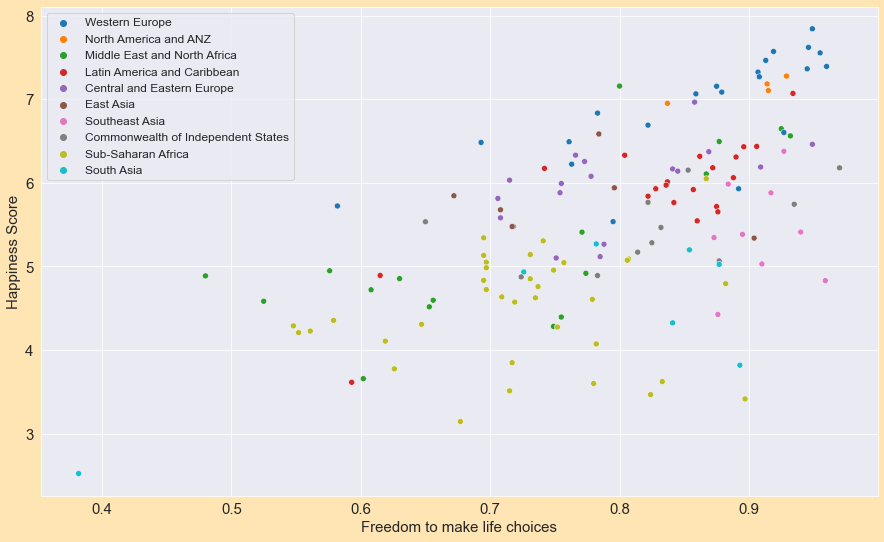

In [24]:
#plot between happiness and freedom to make life choices
plt.rcParams['figure.figsize']=(15,9)
sns.scatterplot(x= happy_df.freedom_to_make_life_choices,y =happy_df.ladder_score,hue=happy_df.regional_indicator)
plt.legend(loc="upper left", fontsize='12')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness Score')

C:\Users\WhiteLuce SIS\AppData\Local\Temp\ipykernel_19896\2744303341.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels,rotation=45,ha='right')
C:\Users\WhiteLuce SIS\AppData\Local\Temp\ipykernel_19896\2744303341.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabels,rotation=45,ha='right')


Text(599.1068181818181, 0.5, 'Corruption Index')

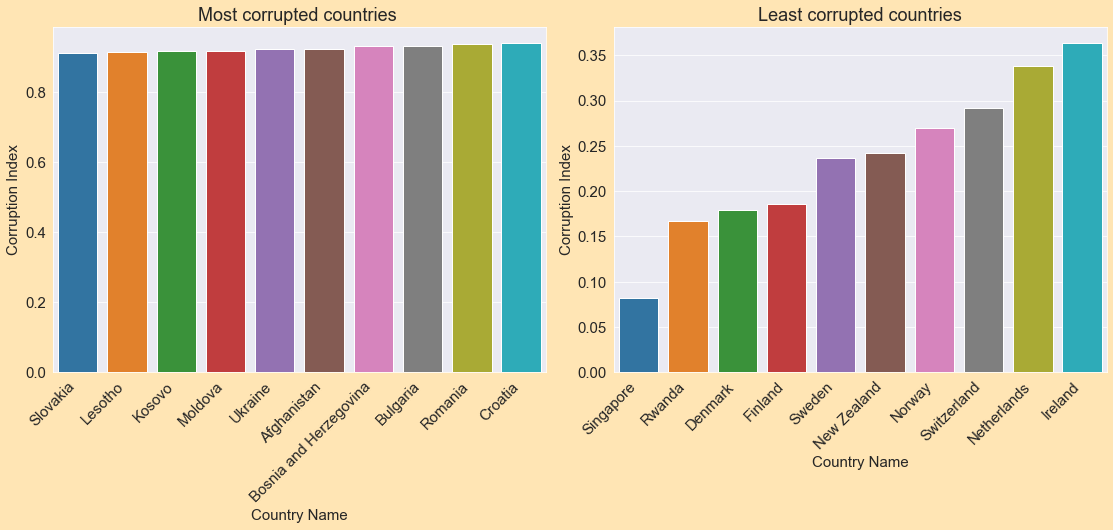

In [25]:
country_bottom=happy_df.sort_values(by='corruption').tail(10)
country_top=happy_df.sort_values(by='corruption').head(10)

fig,axes= plt.subplots(1,2, figsize=(16,6))
plt.tight_layout(pad=2)
xlabels=country_bottom.country_name
axes[0].set_title('Most corrupted countries ')
axes[0].set_xticklabels(xlabels,rotation=45,ha='right')
sns.barplot(x=country_bottom.country_name, y=country_bottom.corruption,ax=axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Corruption Index')

xlabels=country_top.country_name
axes[1].set_title('Least corrupted countries')
axes[1].set_xticklabels(xlabels,rotation=45,ha='right')
sns.barplot(x=country_top.country_name, y=country_top.corruption,ax=axes[1])
axes[1].set_xlabel('Country Name')
axes[1].set_ylabel('Corruption Index')

Text(0, 0.5, 'Corruption')

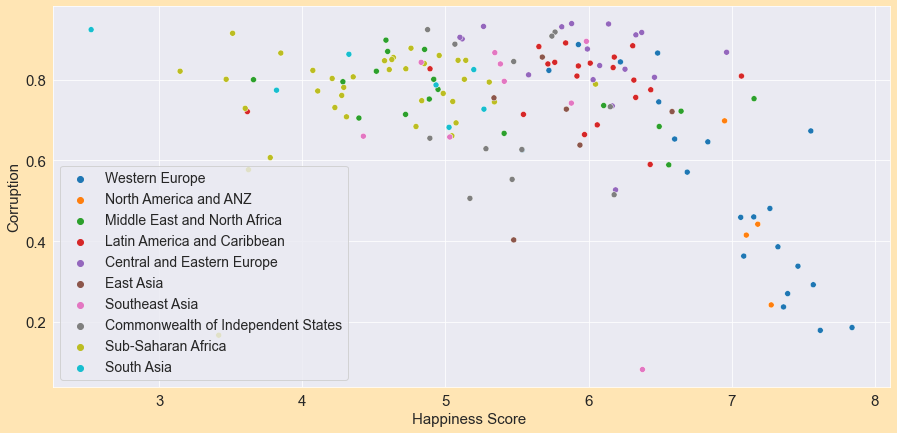

In [26]:
 #corruption vs happiness
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=happy_df.ladder_score,y=happy_df.corruption,hue=happy_df.regional_indicator)
plt.legend(loc='lower left',fontsize='14')
plt.xlabel('Happiness Score ')
plt.ylabel('Corruption')

[0.73203909 0.        ]
-1.3719060741319824


C:\Users\WhiteLuce SIS\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


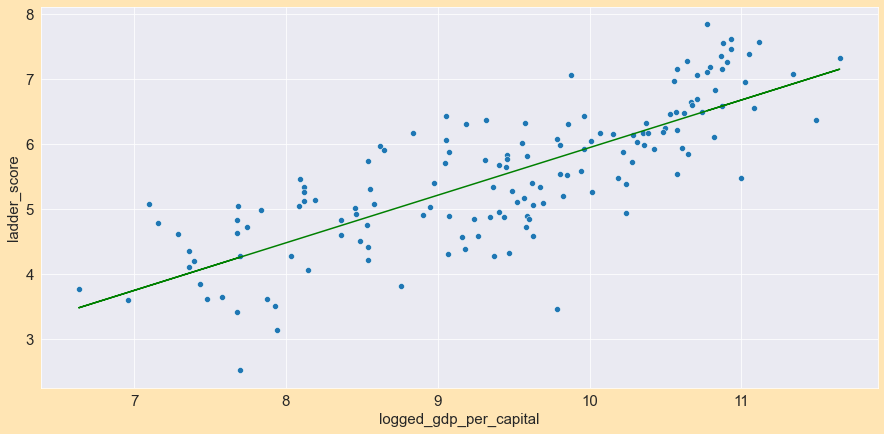

In [27]:
#we want to predict the happiness score of a capital 
from sklearn.linear_model import LinearRegression
model=LinearRegression()
x= happy_df.logged_gdp_per_capital
X= np.array(x)
X=np.reshape(X,(len(X),1))
X=np.append(X,np.ones((len(X),1)),axis=1)
y=happy_df.ladder_score
model.fit(X,y)
print(model.coef_)
print(model.intercept_)
model.predict(X)
sns.scatterplot(x,y)
plt.plot(x,model.predict(X),color="g")

In [28]:
print('coefficient de determination',model.score(X,y))
from sklearn.metrics import mean_squared_error
print('MSE',mean_squared_error(y,model.predict(X)))

coefficient de determination 0.6237203782313993
MSE 0.43105520222908095


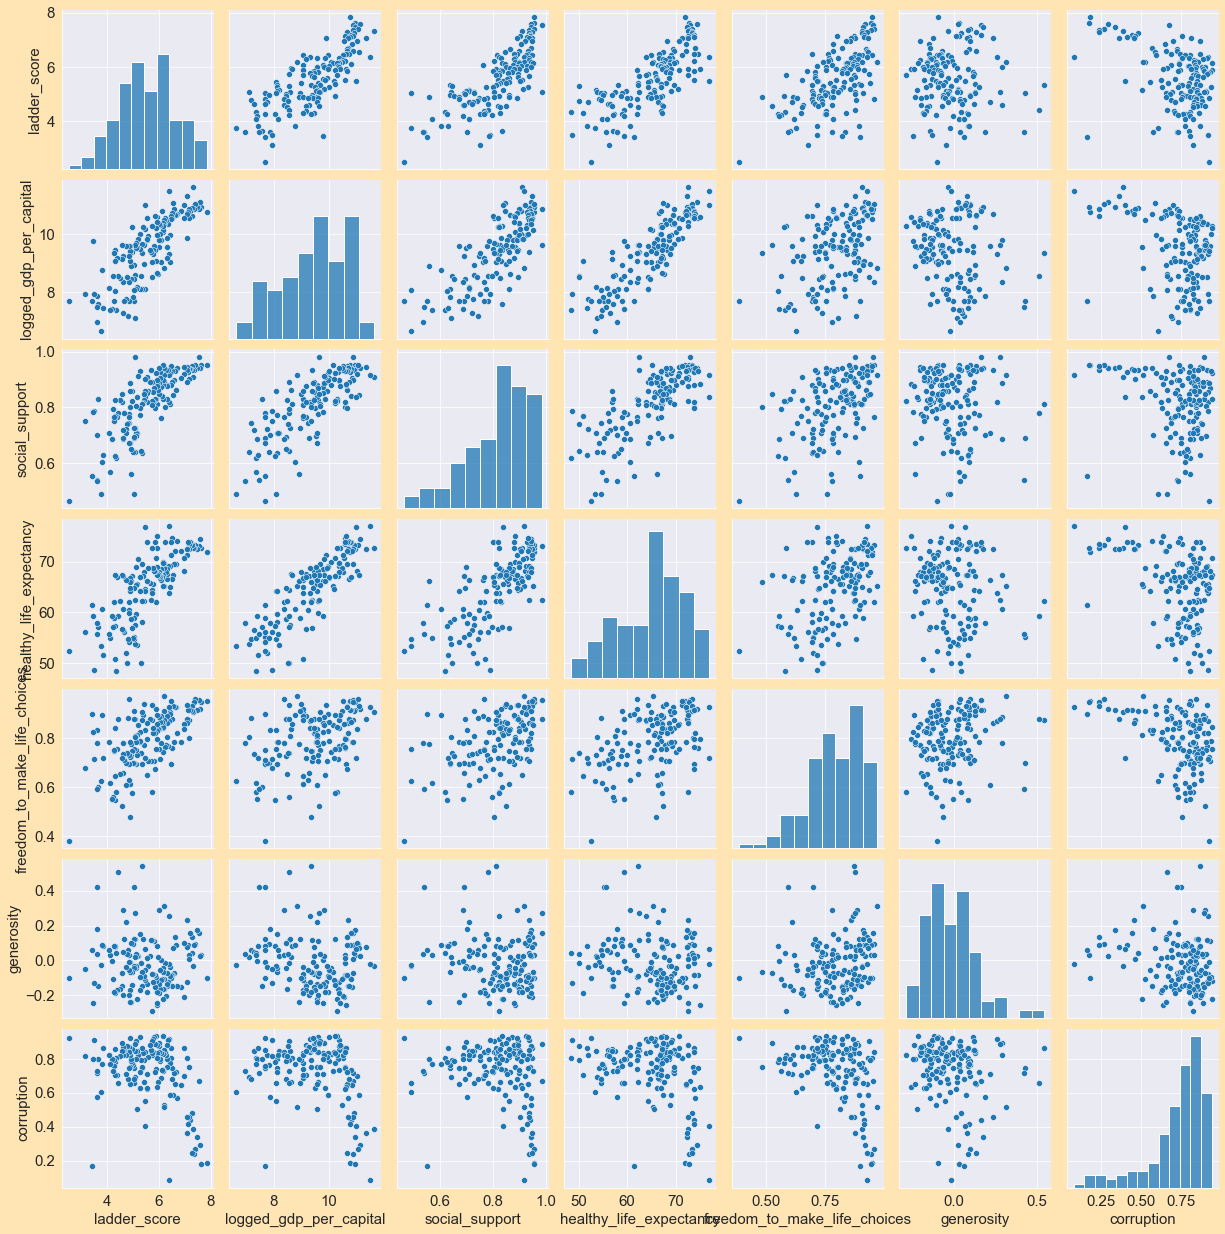

In [29]:
sns.pairplot(happy_df)

In [30]:
# we want to predict the region for a specified life expectancy
from sklearn.neighbors import KNeighborsClassifier
knn2=KNeighborsClassifier(n_neighbors=5)
X=happy_df.drop("regional_indicator",axis=1)
X1=X.drop("country_name",axis=1)
Y=happy_df["regional_indicator"]
knn2.fit(X1,Y)
Ypredit=knn2.predict(X1)
knn2.score(X1,Y)

0.7181208053691275

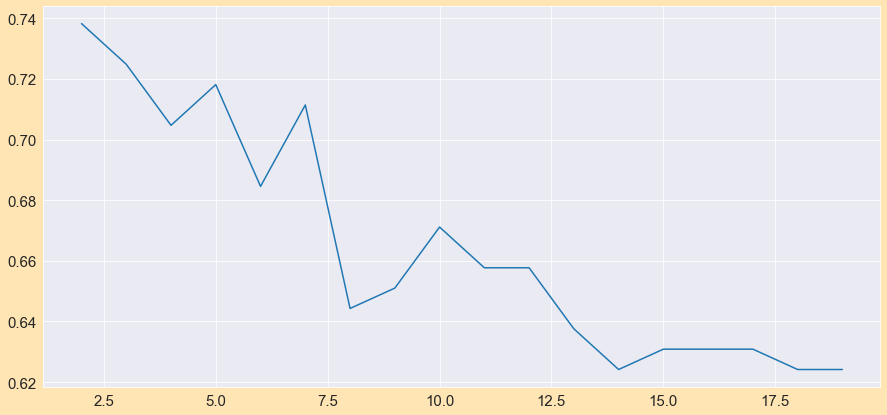

In [31]:
#a line plot showing the variation of classification score depending on the variation of the the number of neighbours
lk,li=[],[]
for i in range(2,20):
    k=KNeighborsClassifier(n_neighbors=i)
    k.fit(X1,Y)
    lk.append(k.score(X1,Y))
    li.append(i)
plt.plot(li,lk)

Text(0, 0.5, 'Happiness Score')

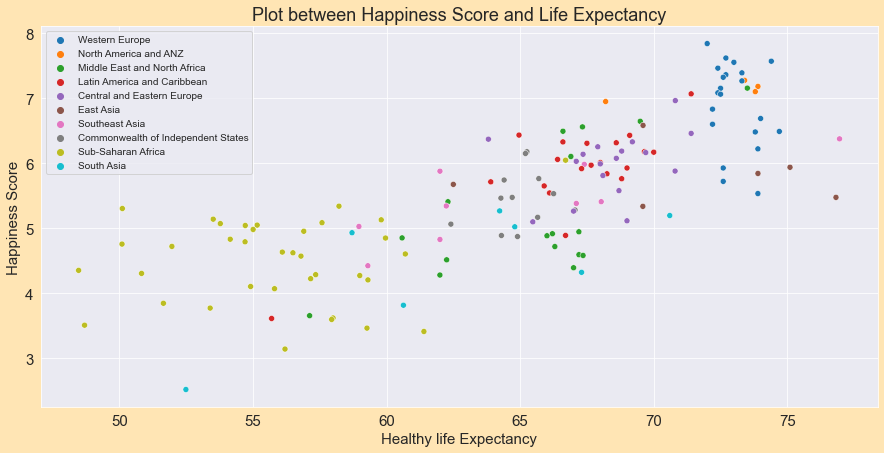

In [32]:
#showing with a scatter plot the variation of the life expectancy and the ladder score showing the specified classes(refgional indicator

#plot between happiness and gdp 
plt.rcParams['figure.figsize']=(15,7)
plt.title('Plot between Happiness Score and Life Expectancy')
sns.scatterplot(x=happy_df.healthy_life_expectancy,y=happy_df.ladder_score,hue=happy_df.regional_indicator)
plt.legend(loc='upper left', fontsize='10')
plt.xlabel('Healthy life Expectancy')
plt.ylabel('Happiness Score')

In [33]:
#let's add a new observation and let's use our knn to do pour classification 
obs=happy_df[:1]
obs=obs.drop("regional_indicator",axis=1)
obs1=obs.drop("country_name",axis=1)
obs1

,ladder_score,logged_gdp_per_capital,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,corruption
0,7.842,10.775,0.954,72.0,0.949,-0.098,0.186


In [34]:
obs1["ladder_score"][0]=7.2
obs1["logged_gdp_per_capital"][0]=10.22
obs1["social_support"][0]=0.9
obs1["healthy_life_expectancy"][0]=75.0
obs1["freedom_to_make_life_choices"][0]=0.30
obs1["generosity"][0]=0.160
obs1["corruption"][0]=0.13


C:\Users\WhiteLuce SIS\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Plot between Happiness Score and Life Expectancy'}, xlabel='Healthy life Expectancy', ylabel='Happiness Score'>

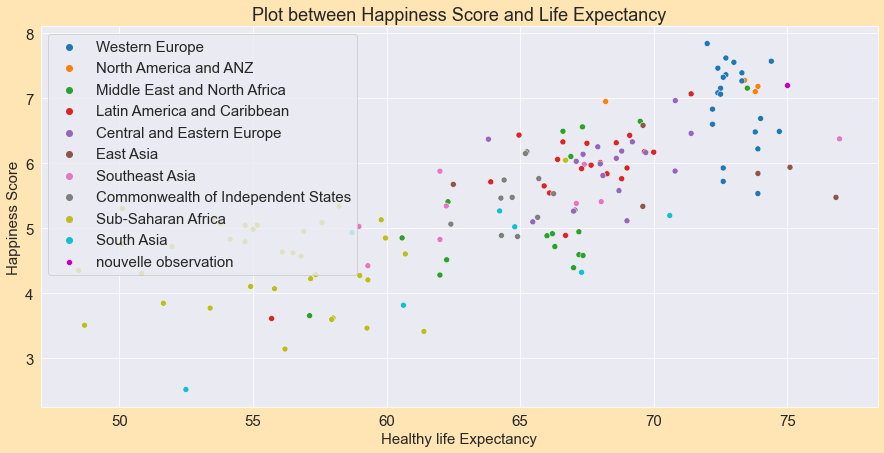

In [35]:
plt.rcParams['figure.figsize']=(15,7)
plt.title('Plot between Happiness Score and Life Expectancy')
sns.scatterplot(x=happy_df.healthy_life_expectancy,y=happy_df.ladder_score,hue=happy_df.regional_indicator)
plt.legend(loc='upper left', fontsize='10')
plt.xlabel('Healthy life Expectancy')
plt.ylabel('Happiness Score')
sns.scatterplot(obs1["healthy_life_expectancy"],obs1["ladder_score"],label="nouvelle observation",color="m")

In [49]:
#ACP using python 
#let's chose the data we will work on 
data_columns=['ladder_score', 'logged_gdp_per_capital', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'corruption']
data_columns
data=data[data_columns].copy()
data


,ladder_score,logged_gdp_per_capital,social_support,healthy_life_expectancy,freedom_to_make_life_choices,corruption
0,7.842,10.775,0.954,72.000,0.949,0.186
1,7.620,10.933,0.954,72.700,0.946,0.179
2,7.571,11.117,0.942,74.400,0.919,0.292
3,7.554,10.878,0.983,73.000,0.955,0.673
4,7.464,10.932,0.942,72.400,0.913,0.338
...,...,...,...,...,...,...
144,3.512,7.926,0.787,48.700,0.715,0.915
145,3.467,9.782,0.784,59.269,0.824,0.801
146,3.415,7.676,0.552,61.400,0.897,0.167
147,3.145,7.943,0.750,56.201,0.677,0.821


In [52]:
#let's load the data into an array and standarize it
X=np.array(data)
X= StandardScaler().fit_transform(X)
X

array([[ 2.15746188e+00,  1.16288545e+00,  1.21617095e+00,
         1.03975002e+00,  1.39355041e+00, -3.03122783e+00],
       [ 1.95004606e+00,  1.29971670e+00,  1.21617095e+00,
         1.14361817e+00,  1.36699018e+00, -3.07041632e+00],
       [ 1.90426509e+00,  1.45906449e+00,  1.11137006e+00,
         1.39586938e+00,  1.12794812e+00, -2.43780212e+00],
       [ 1.88838190e+00,  1.25208557e+00,  1.46943977e+00,
         1.18813309e+00,  1.44667086e+00, -3.04828591e-01],
       [ 1.80429441e+00,  1.29885068e+00,  1.11137006e+00,
         1.09910325e+00,  1.07482767e+00, -2.18027776e+00],
       [ 1.73702441e+00,  1.40363917e+00,  1.21617095e+00,
         1.23264801e+00,  1.49093791e+00, -2.56096595e+00],
       [ 1.70992955e+00,  1.24255935e+00,  1.04150280e+00,
         1.14361817e+00,  1.35813677e+00, -2.74571169e+00],
       [ 1.67349164e+00,  1.91805539e+00,  8.14434209e-01,
         1.12877986e+00,  1.02170721e+00, -1.91155669e+00],
       [ 1.62957928e+00,  1.04857074e+00,  1.163

In [55]:
# do the PCA by creating a pca project as a first step
pca=PCA()
#let's apply our APC on our data using the fit_transform funtion
pca_components = pca.fit_transform(X)
print(pca.n_components_) 

6


In [57]:
print(pca.explained_variance_)

[3.93472876 0.92696777 0.5976831  0.25669291 0.19629055 0.12817745]


Visualisations

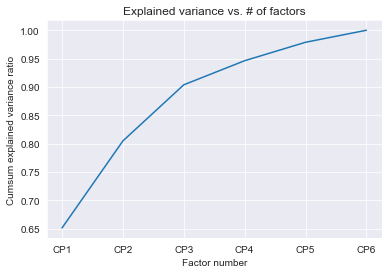

In [58]:
list_acp = ["CP1","CP2","CP3","CP4","CP5","CP6"]
df_acp = pd.DataFrame(list_acp, columns = ["ACP"])
df_acp['explained_variance'] = pca.explained_variance_
plt.plot(list_acp,np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

<AxesSubplot:xlabel='explained_variance', ylabel='ACP'>

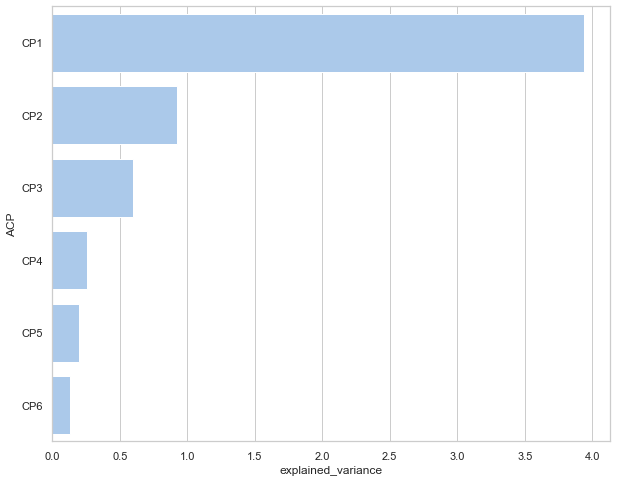

In [59]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="explained_variance", y="ACP", data=df_acp,
            label="Total", color="b")

In [60]:
#let's display our pca components
pca_components

array([[-3.78412097e+00,  2.08608068e+00,  6.00297853e-01,
        -6.92626617e-01, -4.26021846e-01, -6.73299517e-02],
       [-3.79813770e+00,  2.06035524e+00,  7.13717165e-01,
        -5.92255755e-01, -2.09555064e-01, -3.14658759e-03],
       [-3.67472133e+00,  1.41154788e+00,  7.25352410e-01,
        -2.46087521e-01, -2.66623425e-01,  2.86304718e-03],
       [-3.19808473e+00, -2.19994836e-01, -6.69402366e-01,
        -1.21641887e-01, -3.88057473e-01, -2.76855189e-02],
       [-3.33672184e+00,  1.27437819e+00,  5.39054878e-01,
        -3.92981747e-01, -2.98217407e-01,  5.31748887e-02],
       [-3.69938174e+00,  1.66086648e+00,  4.38041341e-01,
        -3.53229266e-01, -3.50753087e-02,  7.48861948e-02],
       [-3.49890570e+00,  1.87103014e+00,  5.87173116e-01,
        -3.76801849e-01, -1.16785305e-01,  1.96470622e-02],
       [-3.35753004e+00,  9.86240025e-01,  6.61593495e-01,
         8.84153620e-03, -2.58722724e-01,  6.03732936e-01],
       [-3.41666811e+00,  1.78205417e+00,  6.551

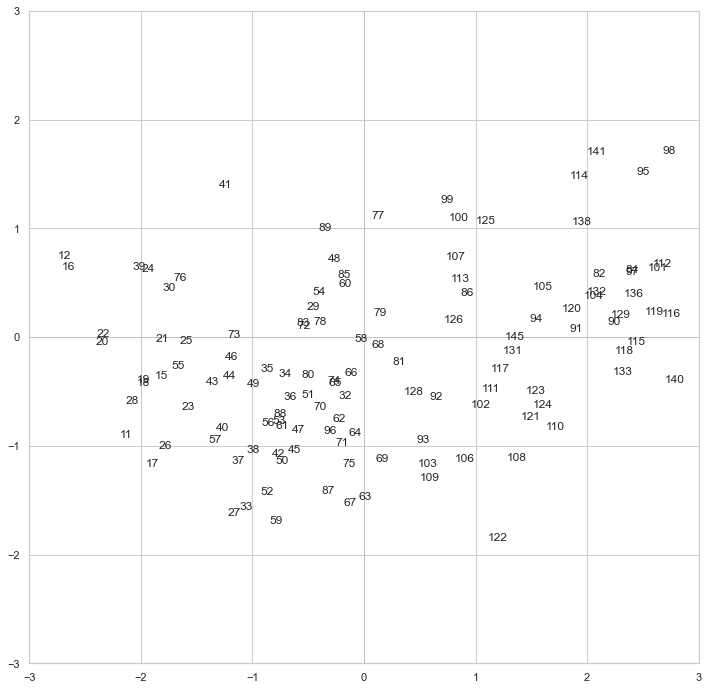

In [67]:
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-3,3) #même limites en abscisse
axes.set_ylim(-3,3) #et en ordonnée
#placement des étiquettes des observations
for i in range(147):
    plt.annotate(data.index[i],(pca_components[i,0],pca_components[i,1]))
#ajouter les axes
plt.plot([-4,4],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-4,4],color='silver',linestyle='-',linewidth=1)
plt.show()

In [69]:
n = data.shape[0] # nb of samples
p = data.shape[1] # nb of features
eigval = (n-1) / n * pca.explained_variance_ # eigen values
sqrt_eigval = np.sqrt(eigval) # square root of the eigen values
corvar = np.zeros((p,p)) # empty matrix to get the coordinates
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
# the dataframe
coordvar = pd.DataFrame({'id': data.columns, 'COR_1': corvar[:,0], 'COR_2': corvar[:,1]})
coordvar

,id,COR_1,COR_2
0,ladder_score,-0.919123,-0.016101
1,logged_gdp_per_capital,-0.904747,-0.228055
2,social_support,-0.853906,-0.321100
3,healthy_life_expectancy,-0.893620,-0.166298
4,freedom_to_make_life_choices,-0.679850,0.372095
5,corruption,0.505036,-0.774121


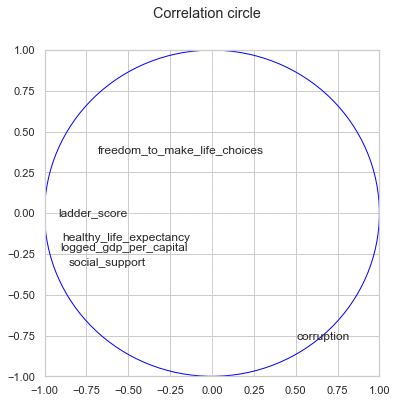

In [71]:
# creating an empty figure
fig, axes = plt.subplots(figsize = (6,6))
fig.suptitle("Correlation circle")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
# adding the axes
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
# adding variables' name
for j in range(p):
    axes.text(coordvar["COR_1"][j],coordvar["COR_2"][j], coordvar["id"][j])
# adding the circle
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

In [72]:
pip install mca

  Created wheel for mca: filename=mca-1.0.3-py2.py3-none-any.whl size=6030 sha256=3e5b18992203e2a46ca4447918da46bf6b30c953d9473e64d562093ac2670164
  Stored in directory: c:\users\whiteluce sis\appdata\local\pip\cache\wheels\2c\91\5a\fa081d100d93bc10099842be0574697300749906f067c673b2
Successfully built mca
Note: you may need to restart the kernel to use updated packages.


In [73]:
from sklearn.decomposition import FactorAnalysis
model = FactorAnalysis(n_components=2)
model.fit(X)
# obtain the factors
factors = model.components_
# obtain the contribution of the variables on each factor
variable_loadings = model.transform(X)

In [74]:
factors.shape

(2, 6)

In [75]:
variable_loadings.shape

(149, 2)

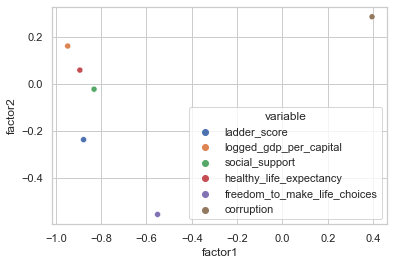

In [77]:
#Create a pandas dataframe that contains the factors and variables' name
df = pd.DataFrame({'factor1': factors[0], 'factor2': factors[1], 'variable': data.columns})

# Creation of scatter plot
sns.scatterplot(x='factor1', y='factor2', hue='variable', data=df)

plt.show()

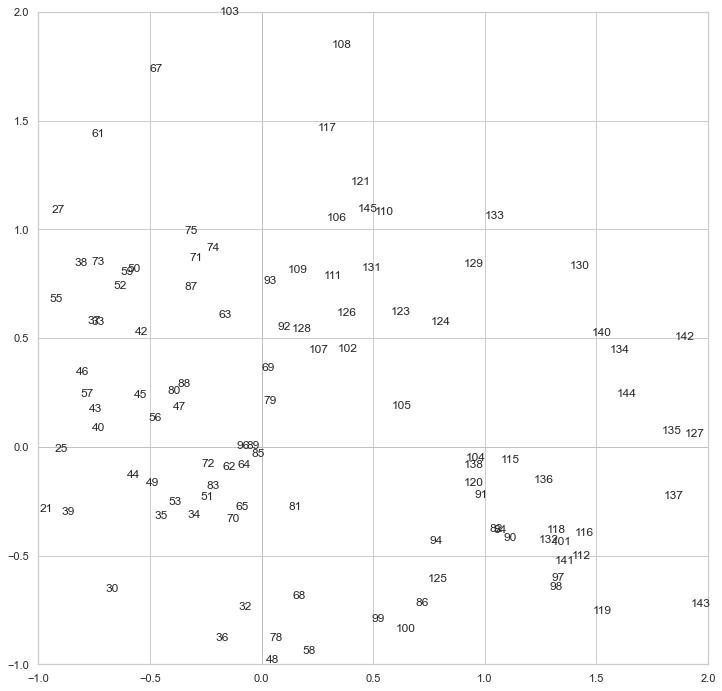

In [78]:
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-1,2)
axes.set_ylim(-1,2) 

for i in range(147):
    plt.annotate(data.index[i],(variable_loadings[i,0],variable_loadings[i,1]))
#ajouter les axes
plt.plot([-4,4],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-4,4],color='silver',linestyle='-',linewidth=1)
plt.show()